	
### Bag of n_grams: Exercise

Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

Fake news spreads faster than Real news and creates problems and fear among groups and in society.

We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

## About Data: Fake News Detection

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

This data consists of two columns. - Text - label

Text is the statements or messages regarding a particular event/situation.

label feature tells whether the given Text is Fake or Real.

As there are only 2 classes, this problem comes under the Binary Classification.

In [1]:
#import pandas library
import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
news = pd.read_csv('Fake_Real_Data.csv')


#print the shape of dataframe
print(news.shape)

#print top 5 rows
news.head()

/var/folders/y5/5kc5fqvn2tncnl_868zg4zhr0000gn/T/ipykernel_34895/1866795895.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [2]:
#check the distribution of labels 
news.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [3]:
#Add the new column "label_num" which gives a unique number to each of these labels 
news['label_num'] = news.label.map({'Fake':0, 'Real':1})

#check the results with top 5 rows
news.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


 Modelling without Pre-processing Text data

In [4]:
#import train-test-split from sklearn 
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(news.Text, news.label_num, train_size=0.2, random_state=2022, stratify=news.label_num)

In [5]:
#print the shapes of X_train and X_test
print(X_test.shape)
print(X_train.shape)

(7920,)
(1980,)


Attempt 1 :

1. using sklearn pipeline module create a classification pipeline to classify the Data.
Note:

> using CountVectorizer with unigram, bigram, and trigrams.
>use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
> print the classification report.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from  sklearn.neighbors import KNeighborsClassifier

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 3))),                   #using the ngram_range parameter 
     ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))           #using the KNN classifier with 10 neighbors and euclidean distance      
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.40      0.56      4000
           1       0.61      0.97      0.75      3920

    accuracy                           0.68      7920
   macro avg       0.77      0.68      0.65      7920
weighted avg       0.77      0.68      0.65      7920



Attempt 2 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with unigram, bigram, and trigrams.
use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
print the classification report.

In [7]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 3))),                   #using the ngram_range parameter 
     ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'cosine')))           #using the KNN classifier with 10 neighbors and cosine distance      
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60      4000
           1       0.63      1.00      0.77      3920

    accuracy                           0.71      7920
   macro avg       0.81      0.71      0.69      7920
weighted avg       0.82      0.71      0.69      7920



Attempt 3 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with only trigrams.
use RandomForest as the classifier.
print the classification report.

In [8]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (3,3))),                   #using the ngram_range parameter 
     ('Random Forest', (RandomForestClassifier()))                                           #using the RandomForest classifier with default parameters      
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4000
           1       0.99      0.99      0.99      3920

    accuracy                           0.99      7920
   macro avg       0.99      0.99      0.99      7920
weighted avg       0.99      0.99      0.99      7920



Attempt 4 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with both unigram and bigrams.
use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
print the classification report.

In [9]:
from sklearn.naive_bayes import MultinomialNB

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 2))),                   #using the ngram_range parameter 
     ('Naive Bayes', (MultinomialNB(alpha=0.75)))                                               #using the naive-bayes classifier with alpha=0.75      
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4000
           1       0.98      0.99      0.98      3920

    accuracy                           0.98      7920
   macro avg       0.98      0.98      0.98      7920
weighted avg       0.98      0.98      0.98      7920



Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [10]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [11]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
news['preprocessed_txt'] = news['Text'].apply(preprocess)
# this will take some time, please be patient

In [12]:
#print the top 5 rows
news.head()

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump Surrogate BRUTALLY Stabs Pathetic vide...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow million illegally pu...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


Build a model with pre processed text

In [13]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(news.preprocessed_txt, news.label_num, train_size=0.2, random_state=2022, stratify=news.label_num)
#Note: Make sure to use only the "preprocessed_txt" column for splitting

Let's check the scores with our best model till now

Random Forest
Attempt1 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with only trigrams.
use RandomForest as the classifier.
print the classification report.

In [14]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (3,3))),                   #using the ngram_range parameter 
     ('Random Forest', (RandomForestClassifier()))                                           #using the RandomForest classifier with default parameters      
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      4000
           1       0.99      0.82      0.90      3920

    accuracy                           0.91      7920
   macro avg       0.92      0.91      0.91      7920
weighted avg       0.92      0.91      0.91      7920



Attempt2 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with unigram, Bigram, and trigrams.
use RandomForest as the classifier.
print the classification report.

In [15]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1,3))),                   #using the ngram_range parameter 
     ('Random Forest', (RandomForestClassifier()))                                           #using the RandomForest classifier with default parameters      
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4000
           1       1.00      0.99      1.00      3920

    accuracy                           1.00      7920
   macro avg       1.00      1.00      1.00      7920
weighted avg       1.00      1.00      1.00      7920



Text(95.72222222222221, 0.5, 'Truth')

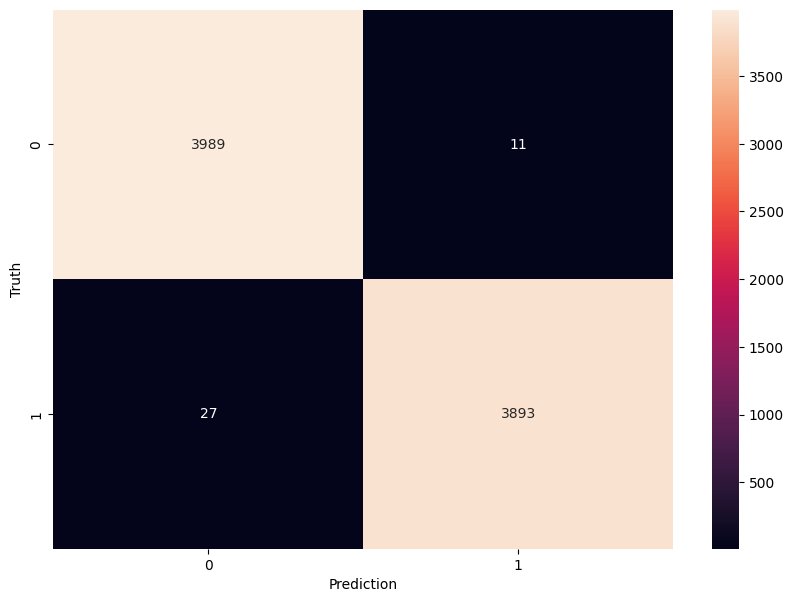

In [17]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

cm = confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')